In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from random import sample
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import SpectralClustering
import pandas_datareader as pdr
import datetime as dt
from matplotlib import pyplot as plt
import numpy as np
import sys
from IPython.display import clear_output
import os
from sklearn import cluster, preprocessing
from scipy.optimize import fsolve, minimize, basinhopping
# import cvxopt as opt
# from cvxopt import blas, solvers
# import ipywidgets as widgets
import time
import bs4 as bs
import pickle
import requests
from sklearn.linear_model import LinearRegression
# from guppy import hpy
# import quandl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, validation_curve, TimeSeriesSplit
from sklearn.metrics import plot_roc_curve
import pickle

In [2]:
df_pred_tom = pd.read_csv(r'D:\Padantra\ulloo_client\data_results\predictions_histgradboost.csv') 
# Upload Tomorrow predictor

In [3]:
all_data = pd.read_csv(r'D:\Padantra\ulloo_client\data_results\ClusterModelNIFTY_500_tech.csv')

In [4]:
all_data

,datetime,open,high,low,close,volume,oi,symbol,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14,return
0,2015-07-01 00:00:00+05:30,308.80,312.70,306.50,311.30,2854143,0,ADANIPORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,2015-07-02 00:00:00+05:30,312.45,319.00,311.89,316.05,8669541,0,ADANIPORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.015259
2,2015-07-03 00:00:00+05:30,319.95,325.75,319.00,320.80,5189498,0,ADANIPORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.015029
3,2015-07-06 00:00:00+05:30,316.95,321.10,316.25,320.10,2853145,0,ADANIPORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,-0.002182
4,2015-07-07 00:00:00+05:30,321.80,334.70,321.60,333.05,7877450,0,ADANIPORTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.040456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71275,2021-06-24 00:00:00+05:30,541.90,550.55,539.20,549.05,8668680,0,WIPRO,56.191052,516.866277,479.302760,424.211505,516.135,470.797,413.98375,12.567813,563.790527,539.459473,-0.050952,0.016477
71276,2021-06-25 00:00:00+05:30,549.85,551.00,540.50,547.50,5039822,0,WIPRO,55.246625,518.067599,480.653200,425.438256,518.706,471.953,415.34125,12.420112,563.799777,539.343080,-0.046613,-0.002823
71277,2021-06-28 00:00:00+05:30,549.75,550.80,544.25,547.40,3259830,0,WIPRO,55.182186,519.217889,481.974919,426.651806,521.040,473.248,416.68450,12.000818,563.746391,538.939323,-0.015149,-0.000183
71278,2021-06-29 00:00:00+05:30,547.80,553.75,541.00,542.60,7927880,0,WIPRO,52.044237,520.134835,483.175416,427.805519,522.508,474.459,417.98475,12.054331,563.908159,538.548984,-0.037253,-0.008769


In [5]:
all_data['datetime'] = pd.to_datetime(all_data['datetime'])

In [6]:
all_data['datetime'] = [d.strftime('%Y-%m-%d') for d in all_data['datetime']]

In [7]:
all_data = all_data.set_index('datetime')

In [8]:
all_data = all_data.reset_index()

In [9]:
df_pred_tom['Date'] = pd.to_datetime(df_pred_tom['Date'])
df_pred_tom['Date'] = [d.strftime('%Y-%m-%d') for d in df_pred_tom['Date']]

In [10]:
df_pred_tom.drop(['Unnamed: 0'],axis= 1, inplace= True)

In [11]:
q = df_pred_tom.Date.unique()

In [12]:
q.sort()

In [13]:
tickers = all_data.symbol.unique()

tickers

array(['ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO',
       'BAJFINANCE', 'BAJAJFINSV', 'BPCL', 'BHARTIARTL', 'BRITANNIA',
       'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM',
       'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'HDFC', 'ICICIBANK', 'ITC', 'INDUSINDBK', 'INFY', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NTPC', 'NESTLEIND', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SHREECEM', 'SBIN', 'SUNPHARMA', 'TCS',
       'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TECHM', 'TITAN', 'UPL',
       'ULTRACEMCO', 'WIPRO'], dtype=object)

In [14]:
for i in range(len(tickers)):
    str = tickers[i]
    str += "_return"
    tickers = np.append(tickers, str)
print(tickers)

['ADANIPORTS' 'APOLLOHOSP' 'ASIANPAINT' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJFINANCE' 'BAJAJFINSV' 'BPCL' 'BHARTIARTL' 'BRITANNIA' 'CIPLA'
 'COALINDIA' 'DIVISLAB' 'DRREDDY' 'EICHERMOT' 'GRASIM' 'HCLTECH'
 'HDFCBANK' 'HEROMOTOCO' 'HINDALCO' 'HINDUNILVR' 'HDFC' 'ICICIBANK' 'ITC'
 'INDUSINDBK' 'INFY' 'JSWSTEEL' 'KOTAKBANK' 'LT' 'M&M' 'MARUTI' 'NTPC'
 'NESTLEIND' 'ONGC' 'POWERGRID' 'RELIANCE' 'SHREECEM' 'SBIN' 'SUNPHARMA'
 'TCS' 'TATACONSUM' 'TATAMOTORS' 'TATASTEEL' 'TECHM' 'TITAN' 'UPL'
 'ULTRACEMCO' 'WIPRO' 'ADANIPORTS_return' 'APOLLOHOSP_return'
 'ASIANPAINT_return' 'AXISBANK_return' 'BAJAJ-AUTO_return'
 'BAJFINANCE_return' 'BAJAJFINSV_return' 'BPCL_return' 'BHARTIARTL_return'
 'BRITANNIA_return' 'CIPLA_return' 'COALINDIA_return' 'DIVISLAB_return'
 'DRREDDY_return' 'EICHERMOT_return' 'GRASIM_return' 'HCLTECH_return'
 'HDFCBANK_return' 'HEROMOTOCO_return' 'HINDALCO_return'
 'HINDUNILVR_return' 'HDFC_return' 'ICICIBANK_return' 'ITC_return'
 'INDUSINDBK_return' 'INFY_return' 'JSWSTEEL_return' 'KOT

In [15]:
all_data['datetime'].unique()
df_ans = pd.DataFrame(columns=['datetime'])

In [16]:
df_ans.datetime = all_data['datetime'].unique()
df_ans[tickers] = 0

In [17]:
df_ans

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA_return,TCS_return,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return
0,2015-07-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-07-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-07-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-07-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-07-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2021-06-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,2021-06-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1482,2021-06-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,2021-06-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [19]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [20]:
df_ans

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA_return,TCS_return,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return
0,2015-07-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-07-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-07-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-07-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-07-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2021-06-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,2021-06-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1482,2021-06-28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1483,2021-06-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [22]:
df_pred_tom[df_pred_tom['Date'] == '2019-01-02'].head(6)

,Date,company,prediction
1,2019-01-02,SBIN,0.996534
349,2019-01-02,AXISBANK,0.883889
405,2019-01-02,APOLLOHOSP,0.852501
452,2019-01-02,NESTLEIND,0.832451
464,2019-01-02,SHREECEM,0.827627
475,2019-01-02,INFY,0.819236


In [23]:
all_data[all_data['symbol'] == 'HDFCBANK'][(all_data['datetime'] >= '2019-01-02') & (all_data['datetime'] <= '2019-01-11')]

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\2330509441.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data[all_data['symbol'] == 'HDFCBANK'][(all_data['datetime'] >= '2019-01-02') & (all_data['datetime'] <= '2019-01-11')]


,datetime,open,high,low,close,volume,oi,symbol,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14,return
26112,2019-01-02,1071.40,1073.75,1059.85,1064.25,2033558,0,HDFCBANK,56.806882,1034.280284,1023.843139,1003.044056,1020.224,1018.1270,1014.29775,18.216601,1076.612236,1042.216336,-0.084888,-0.009124
26113,2019-01-03,1062.10,1064.10,1051.50,1055.90,3192916,0,HDFCBANK,53.231943,1035.128116,1024.477928,1003.569985,1021.353,1018.0780,1014.92675,17.826130,1076.448840,1043.129731,-0.089137,-0.007846
26114,2019-01-04,1057.60,1064.25,1055.15,1058.70,1821780,0,HDFCBANK,54.271178,1036.052504,1025.155593,1004.118543,1022.679,1018.0935,1015.55900,17.202835,1075.941028,1045.187543,-0.076431,0.002652
26115,2019-01-07,1063.85,1067.65,1059.00,1060.30,1346753,0,HDFCBANK,54.888061,1037.003386,1025.851522,1004.677562,1023.963,1018.0420,1016.15850,16.613347,1075.399262,1045.043595,-0.174361,0.001511
26116,2019-01-08,1061.00,1061.75,1048.30,1051.50,2085865,0,HDFCBANK,50.826870,1037.571881,1026.359413,1005.143457,1025.305,1017.8755,1016.78350,16.387393,1074.254666,1043.873905,-0.262215,-0.008300
26117,2019-01-09,1059.00,1060.65,1051.30,1058.40,2142157,0,HDFCBANK,53.718446,1038.388670,1026.993880,1005.673373,1026.861,1017.8670,1017.45750,15.884722,1073.953024,1043.704119,-0.180158,0.006562
26118,2019-01-10,1058.50,1061.90,1046.30,1054.25,1922885,0,HDFCBANK,51.747478,1039.010683,1027.533605,1006.156722,1028.683,1017.8375,1018.13000,15.864385,1072.067726,1043.525131,-0.237753,-0.003921
26119,2019-01-11,1056.90,1062.00,1054.00,1055.95,1602010,0,HDFCBANK,52.516056,1039.674970,1028.096306,1006.652178,1030.675,1017.9390,1018.76250,15.302643,1072.080439,1043.569561,-0.193111,0.001613


In [24]:
list(df_pred_tom[df_pred_tom['Date'] == '2019-01-02'].company.head(5))

['SBIN', 'AXISBANK', 'APOLLOHOSP', 'NESTLEIND', 'SHREECEM']

In [25]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [26]:
list(df_pred_tom[df_pred_tom['Date'] == '2019-01-02'].company.head(5))

['SBIN', 'AXISBANK', 'APOLLOHOSP', 'NESTLEIND', 'SHREECEM']

In [27]:
df_ans.loc[(df_ans['datetime'] >= '2019-01-02') & (df_ans['datetime'] <= '2019-01-11'),'BAJAJFINSV']

867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    0
Name: BAJAJFINSV, dtype: int64

In [28]:
# df_ans

In [29]:
for date in range(0, len(q) -1):
    print(q[date], q[date + 1])
    for tick in list(df_pred_tom[df_pred_tom['Date'] == q[date]].company.head(5)):
        # print(list(all_data[all_data['symbol'] == tick][(all_data['datetime'] >= q[date]) & (all_data['datetime'] <= q[date + 1])].close))
        df_ans.loc[(df_ans['datetime'] >= q[date]) & (df_ans['datetime'] <= q[date + 1]),tick] = list(all_data[all_data['symbol'] == tick][(all_data['datetime'] >= q[date]) & (all_data['datetime'] <= q[date + 1])].close)

2019-01-02 2019-01-11
2019-01-11 2019-01-22


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\444069846.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_ans.loc[(df_ans['datetime'] >= q[date]) & (df_ans['datetime'] <= q[date + 1]),tick] = list(all_data[all_data['symbol'] == tick][(all_data['datetime'] >= q[date]) & (all_data['datetime'] <= q[date + 1])].close)


2019-01-22 2019-01-31
2019-01-31 2019-02-11
2019-02-11 2019-02-20
2019-02-20 2019-03-01
2019-03-01 2019-03-13
2019-03-13 2019-03-25
2019-03-25 2019-04-03
2019-04-03 2019-04-12
2019-04-12 2019-04-25
2019-04-25 2019-05-08
2019-05-08 2019-05-17
2019-05-17 2019-05-28
2019-05-28 2019-06-07
2019-06-07 2019-06-18
2019-06-18 2019-06-27
2019-06-27 2019-07-08
2019-07-08 2019-07-17
2019-07-17 2019-07-26
2019-07-26 2019-08-06
2019-08-06 2019-08-19
2019-08-19 2019-08-28
2019-08-28 2019-09-09
2019-09-09 2019-09-19
2019-09-19 2019-09-30
2019-09-30 2019-10-11
2019-10-11 2019-10-23
2019-10-23 2019-11-01
2019-11-01 2019-11-13
2019-11-13 2019-11-22
2019-11-22 2019-12-03
2019-12-03 2019-12-12
2019-12-12 2019-12-23
2019-12-23 2020-01-02
2020-01-02 2020-01-13
2020-01-13 2020-01-22
2020-01-22 2020-01-31
2020-01-31 2020-02-10
2020-02-10 2020-02-19
2020-02-19 2020-03-02
2020-03-02 2020-03-12
2020-03-12 2020-03-23
2020-03-23 2020-04-01
2020-04-01 2020-04-16
2020-04-16 2020-04-27
2020-04-27 2020-05-07
2020-05-07

In [30]:
df_ans[(df_ans['datetime'] >= '2019-01-02') & (df_ans['datetime'] <= "2021-06-09")]

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA_return,TCS_return,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return
867,2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
868,2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
869,2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
870,2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
871,2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1466,2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1467,2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1468,2021-06-08,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# for date in range(0,len(q) -1):
#     print(q[date], q[date +1])
#     onlycom = all_data.loc[all_data['symbol'].isin(list(df_pred_tom[df_pred_tom['Date'] == q[date]].company.head(5)))]
#     for i in list(df_pred_tom[df_pred_tom['Date'] == q[date]].company.head(5)):
#         # print(i)
#         subcom = onlycom.loc[(onlycom['datetime'] >= q[date]) & (onlycom['datetime'] <= q[date+1]) & (onlycom['symbol'] == i)]
#         # print(subcom[['datetime','symbol','close']])
#         # print(list(subcom))
#         df_subcom = subcom[['datetime', 'close']]
#         df_subcom.rename(columns= {'close' : i }, inplace =True)
#         # print(df_subcom)
#         for j in list(df_subcom.datetime):
#             # print(list(df_subcom.loc[df_subcom['datetime'] == j,i]))
#             df_ans.loc[df_ans['datetime'] == j, i] = list(df_subcom.loc[df_subcom['datetime'] == j,i])[0]
            
#         # df_ans.loc[df_ans['datetime'] == q[date], i] = list(subcom.close)
#         # print(df_ans[df_ans['datetime'] == q[date]][i])
        
#     # print(list(df_pred_tom[df_pred_tom['Date'] == q[date]].company.head(5)))
#     # print(all_data[(all_data['datetime'] == q[date])])
#     # print(all_data.loc[all_data['symbol'].isin(list(df_pred_tom[df_pred_tom['Date'] == q[date]].company.head(5)))])

In [32]:
ticks = all_data.symbol.unique()

In [33]:
all_data[all_data['datetime'] == '2021-06-24']

,datetime,open,high,low,close,volume,oi,symbol,rsi,ema_50,ema_100,ema_200,sma_50,sma_100,sma_200,ATR_14,bollinger_hband_14,bollinger_lband_14,Chaikin_MFI_14,return
1480,2021-06-24,724.00,725.00,701.70,709.90,21503302,0,ADANIPORTS,41.766047,753.039248,704.036903,610.637269,761.987,720.8470,565.98175,44.404366,911.661715,627.295427,-0.036791,-0.012244
2965,2021-06-24,3229.90,3281.65,3141.75,3203.25,1754163,0,APOLLOHOSP,44.278194,3202.500233,3038.655832,2708.470553,3232.091,3079.6740,2652.60150,78.018214,3366.373472,3193.905099,-0.033961,-0.012805
4450,2021-06-24,2987.35,3049.70,2975.45,3043.25,985596,0,ASIANPAINT,64.044495,2829.325370,2684.956416,2478.017801,2787.555,2618.9890,2459.84000,61.304350,3092.913916,2898.228941,0.212306,0.018712
5935,2021-06-24,735.90,742.95,731.10,739.15,5313822,0,AXISBANK,52.286070,726.016582,703.721960,660.080060,718.007,721.3745,637.84375,16.154074,752.758019,729.977696,0.115948,0.009285
7420,2021-06-24,4190.00,4236.20,4156.75,4226.90,314542,0,BAJAJ-AUTO,59.614295,4048.194369,3893.919602,3646.366317,4002.327,3938.9435,3561.97750,80.036680,4290.237901,4072.954956,0.033139,0.006740
8905,2021-06-24,6027.00,6108.00,6011.00,6043.60,1082421,0,BAJFINANCE,58.914032,5683.073368,5402.836213,4931.238481,5541.901,5434.8345,4821.21450,165.396064,6321.879445,5697.013412,0.033419,0.004655
10390,2021-06-24,1228.20,1239.60,1216.50,1233.30,2785730,0,BAJAJFINSV,67.001434,1132.558616,1055.859319,949.508708,1124.937,1050.7960,896.25500,31.018379,1235.836384,1154.485044,0.023705,0.004152
11875,2021-06-24,469.50,470.50,465.10,466.10,4231105,0,BPCL,45.965641,459.475226,443.316034,425.923523,452.313,441.7480,411.88500,8.956469,490.825593,466.538692,-0.213871,-0.007453
13360,2021-06-24,525.15,525.60,517.70,519.00,6419925,0,BHARTIARTL,43.905529,527.999185,526.784663,517.379103,529.173,536.1475,505.94725,10.600155,537.986697,518.456160,-0.062862,-0.009920
14845,2021-06-24,3659.30,3704.85,3651.00,3689.10,385390,0,BRITANNIA,67.546121,3554.452359,3548.960595,3527.049918,3539.905,3523.1575,3576.71425,56.802649,3699.966053,3534.505375,0.231953,0.008144


In [34]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [35]:
print(list(df_ans[df_ans['datetime'] == '2021-06-24'].sum()))

['2021-06-24', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0.0, 0.0, 0, 0.0, 0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [36]:
results = df_ans[(df_ans['datetime'] >= '2019-01-02') & (df_ans['datetime'] <= '2021-06-09')]
 

In [37]:
results

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA_return,TCS_return,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return
867,2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
868,2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
869,2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
870,2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
871,2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1466,2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1467,2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1468,2021-06-08,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
for i in ticks:
    print(i)
    results[i+'_return'] = results[i].pct_change()

ADANIPORTS
APOLLOHOSP
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BPCL
BHARTIARTL
BRITANNIA
CIPLA
COALINDIA
DIVISLAB


C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\3248805606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results[i+'_return'] = results[i].pct_change()


DRREDDY
EICHERMOT
GRASIM
HCLTECH
HDFCBANK
HEROMOTOCO
HINDALCO
HINDUNILVR
HDFC
ICICIBANK
ITC
INDUSINDBK
INFY
JSWSTEEL
KOTAKBANK
LT
M&M
MARUTI
NTPC
NESTLEIND
ONGC
POWERGRID
RELIANCE
SHREECEM
SBIN
SUNPHARMA
TCS
TATACONSUM
TATAMOTORS
TATASTEEL
TECHM
TITAN
UPL
ULTRACEMCO
WIPRO


In [39]:
results.replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\1963660892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.replace([np.inf, -np.inf], 0, inplace=True)


In [40]:
results.replace(-1,0, inplace= True)

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\3621320906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.replace(-1,0, inplace= True)


In [41]:
results

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,SUNPHARMA_return,TCS_return,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return
867,2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,NaN,0.003771,NaN,NaN,-0.001779,NaN,NaN,NaN,NaN,NaN
1466,2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,NaN,0.000796,NaN,NaN,-0.001337,NaN,NaN,NaN,NaN,NaN
1467,2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,NaN,0.012549,NaN,NaN,0.007140,NaN,NaN,NaN,NaN,NaN
1468,2021-06-08,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,NaN,0.005325,NaN,NaN,-0.015507,NaN,NaN,NaN,NaN,NaN


In [42]:
results.fillna(0, inplace= True)

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\3414117045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.fillna(0, inplace= True)


In [43]:
results["returns_net"] = [0]*len(results)
for i in ticks:
    results["returns_net"] += results[i+'_return']  
results["returns_net"] = results["returns_net"]/5

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\2300726122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["returns_net"] = [0]*len(results)
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\2300726122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["returns_net"] += results[i+'_return']
C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\2300726122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

In [44]:
results['BAJAJFINSV'],results['BAJAJFINSV_return']

(867     0
 868     0
 869     0
 870     0
 871     0
        ..
 1465    0
 1466    0
 1467    0
 1468    0
 1469    0
 Name: BAJAJFINSV, Length: 603, dtype: int64,
 867     0.0
 868     0.0
 869     0.0
 870     0.0
 871     0.0
        ... 
 1465    0.0
 1466    0.0
 1467    0.0
 1468    0.0
 1469    0.0
 Name: BAJAJFINSV_return, Length: 603, dtype: float64)

In [45]:
res = results.set_index('datetime')

In [46]:
res = res['returns_net']


In [47]:
results.set_index(['datetime'], inplace= True)

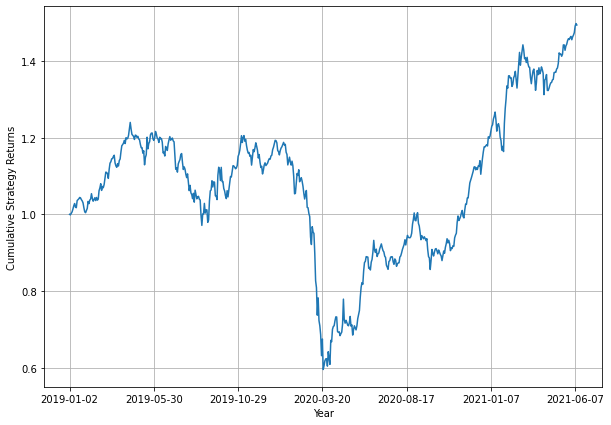

In [48]:
# Plot the cumulative strategy returns
(results['returns_net'] +1).cumprod().plot(figsize=(10, 7), grid=True)
plt.xlabel('Year')
plt.ylabel('Cumulative Strategy Returns')
plt.show()

In [49]:
pip install pyfolio 


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pyfolio as pf

d:\Padantra\ulloo_client\tenv\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [51]:
results['Signal'] = [1]*len(results)
results

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\1194930678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Signal'] = [1]*len(results)


,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,...,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return,returns_net,Signal
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1
2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.001341,1
2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.003648,1
2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004175,1
2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.007292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3496.25,...,0.0,0.0,-0.001779,0.0,0.0,0.0,0.0,0.0,0.003135,1
2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3489.30,...,0.0,0.0,-0.001337,0.0,0.0,0.0,0.0,0.0,0.004353,1
2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3542.60,...,0.0,0.0,0.007140,0.0,0.0,0.0,0.0,0.0,0.011685,1


In [52]:
df_indiavix = pd.read_csv(r'D:\Padantra\ulloo_client\INDIA_VIX_2019.csv')
df_indiavix = df_indiavix[['datetime','close']]
df_indiavix

,datetime,close
0,2019-01-01 00:00:00+05:30,15.33
1,2019-01-02 00:00:00+05:30,16.39
2,2019-01-03 00:00:00+05:30,16.79
3,2019-01-04 00:00:00+05:30,16.16
4,2019-01-07 00:00:00+05:30,16.30
...,...,...
613,2021-06-24 00:00:00+05:30,15.10
614,2021-06-25 00:00:00+05:30,13.37
615,2021-06-28 00:00:00+05:30,13.40
616,2021-06-29 00:00:00+05:30,13.00


In [53]:
df_indiavix['datetime'] = pd.to_datetime(df_indiavix['datetime'])

In [54]:
df_indiavix['datetime'] = [d.strftime('%Y-%m-%d') for d in df_indiavix['datetime']]
df_indiavix

,datetime,close
0,2019-01-01,15.33
1,2019-01-02,16.39
2,2019-01-03,16.79
3,2019-01-04,16.16
4,2019-01-07,16.30
...,...,...
613,2021-06-24,15.10
614,2021-06-25,13.37
615,2021-06-28,13.40
616,2021-06-29,13.00


In [55]:
df_indiavix.rename(columns= {'close' : 'Indiavix'}, inplace= True)

In [56]:
results

,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,...,TATACONSUM_return,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return,returns_net,Signal
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1
2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.001341,1
2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.003648,1
2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004175,1
2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,0.00,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.007292,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3496.25,...,0.0,0.0,-0.001779,0.0,0.0,0.0,0.0,0.0,0.003135,1
2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3489.30,...,0.0,0.0,-0.001337,0.0,0.0,0.0,0.0,0.0,0.004353,1
2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,3542.60,...,0.0,0.0,0.007140,0.0,0.0,0.0,0.0,0.0,0.011685,1


In [57]:
results = results.merge(df_indiavix,how='left', on='datetime')

In [58]:
results['Indiavix'].iloc[0]

16.39

In [59]:
results

,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,...,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return,returns_net,Signal,Indiavix
0,2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,16.39
1,2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.001341,1,16.79
2,2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.003648,1,16.16
3,2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004175,1,16.30
4,2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.007292,1,15.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0.0,-0.001779,0.0,0.0,0.0,0.0,0.0,0.003135,1,15.75
599,2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0.0,-0.001337,0.0,0.0,0.0,0.0,0.0,0.004353,1,15.94
600,2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0.0,0.007140,0.0,0.0,0.0,0.0,0.0,0.011685,1,15.57
601,2021-06-08,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,0,...,0.0,-0.015507,0.0,0.0,0.0,0.0,0.0,0.004336,1,15.23


In [60]:
for i in range(0,len(results)):
    if results['Indiavix'].iloc[i] > 25:
        results['Signal'].iloc[i] = 0

C:\Users\Mayrip\AppData\Local\Temp\ipykernel_4364\3448859574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Signal'].iloc[i] = 0


In [61]:
results.reset_index(inplace= True)

In [62]:
results

,index,datetime,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,...,TATAMOTORS_return,TATASTEEL_return,TECHM_return,TITAN_return,UPL_return,ULTRACEMCO_return,WIPRO_return,returns_net,Signal,Indiavix
0,0,2019-01-02,0.0,1258.75,0.0,620.05,0.0,0.0,0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1,16.39
1,1,2019-01-03,0.0,1266.65,0.0,607.95,0.0,0.0,0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,-0.001341,1,16.79
2,2,2019-01-04,0.0,1293.00,0.0,619.60,0.0,0.0,0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.003648,1,16.16
3,3,2019-01-07,0.0,1282.10,0.0,637.45,0.0,0.0,0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.004175,1,16.30
4,4,2019-01-08,0.0,1249.50,0.0,650.90,0.0,0.0,0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.007292,1,15.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,598,2021-06-03,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,...,0.0,-0.001779,0.0,0.0,0.0,0.0,0.0,0.003135,1,15.75
599,599,2021-06-04,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,...,0.0,-0.001337,0.0,0.0,0.0,0.0,0.0,0.004353,1,15.94
600,600,2021-06-07,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,...,0.0,0.007140,0.0,0.0,0.0,0.0,0.0,0.011685,1,15.57
601,601,2021-06-08,0.0,0.00,0.0,0.00,0.0,0.0,0,0.0,...,0.0,-0.015507,0.0,0.0,0.0,0.0,0.0,0.004336,1,15.23


In [63]:
results['datetime'] = pd.to_datetime(results.datetime)
results.set_index('datetime',inplace= True)

<AxesSubplot:xlabel='datetime'>

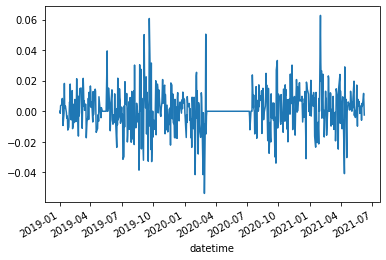

In [64]:
(results['returns_net']*results['Signal']).plot()

d:\Padantra\ulloo_client\tenv\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-02
End date,2021-06-09
Total months,28
,Backtest
Annual return,28.5%
Cumulative returns,82.3%
Annual volatility,20.3%
Sharpe ratio,1.34
Calmar ratio,1.26
Stability,0.32
Max drawdown,-22.6%


d:\Padantra\ulloo_client\tenv\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


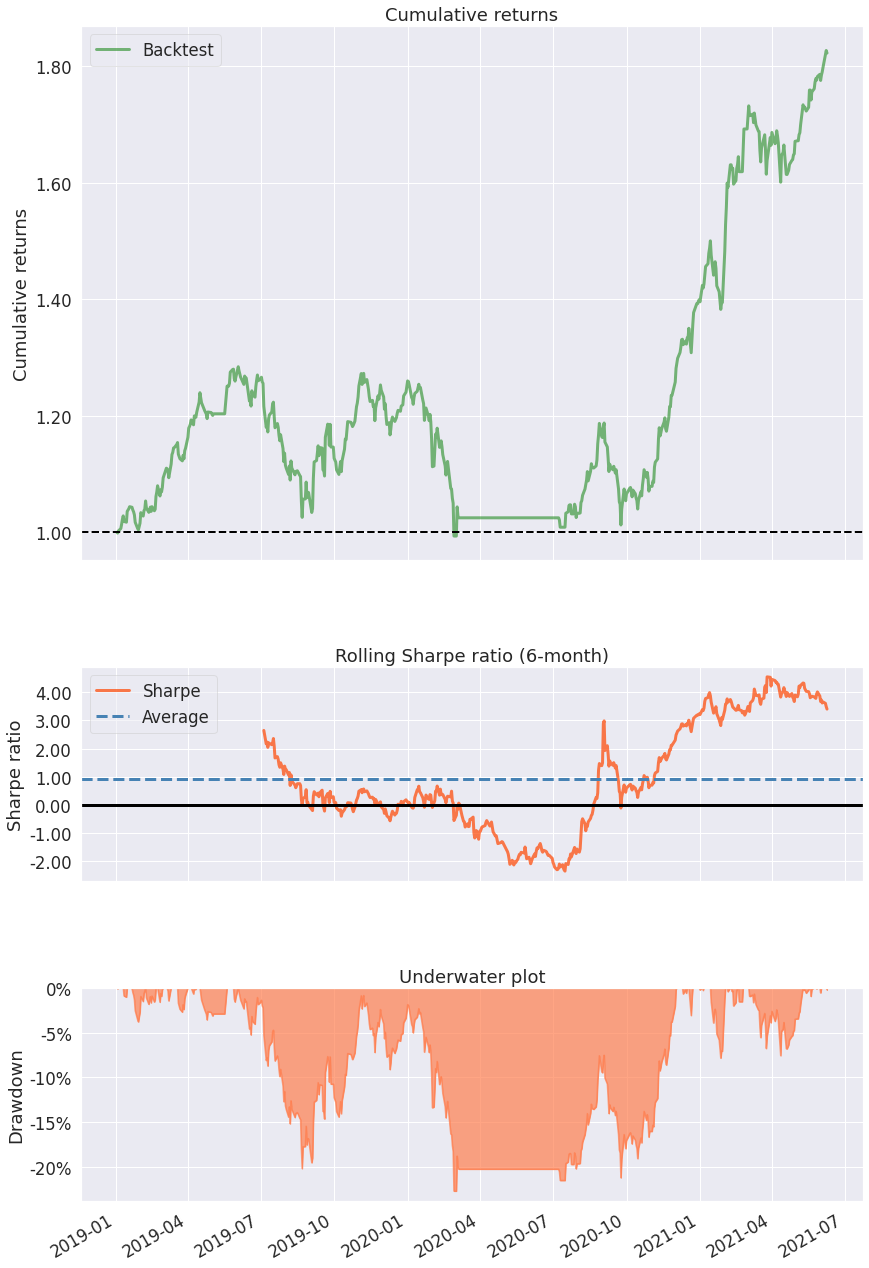

In [65]:
pf.create_simple_tear_sheet(results['returns_net']*results['Signal'])

In [66]:
df_pred_tom

,Date,company,prediction
0,2019-07-26,COALINDIA,0.997708
1,2019-01-02,SBIN,0.996534
2,2020-03-02,TATASTEEL,0.995709
3,2020-03-23,TATAMOTORS,0.995253
4,2020-10-14,ADANIPORTS,0.995123
...,...,...,...
3823,2020-12-14,BAJFINANCE,0.000417
3824,2020-11-03,BAJFINANCE,0.000417
3825,2021-01-04,BAJFINANCE,0.000415
3826,2019-04-03,BAJFINANCE,0.000397


In [67]:
list(df_pred_tom[df_pred_tom['Date'] == q[2]].head(5).tail(1).prediction)[0]

0.8479631994970311

In [68]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [69]:
s= pd.DataFrame()
df = []
for date in range(0, len(q)):
    # print(q[date], q[date + 1])
    df.append(list(df_pred_tom[df_pred_tom['Date'] == q[date]].head(5).tail(1).prediction)[0])
    
        

In [70]:
data = {'date' : q, '5th' : df}
s = pd.DataFrame(data)
s.set_index("date", inplace= True)

In [71]:
from datetime import datetime
from matplotlib.dates import date2num

In [72]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [73]:
s["no"] = [i for i in range(0,87) ]

In [74]:
s.reset_index(inplace=True)
s.set_index("no",inplace = True)

In [75]:
q

array(['2019-01-02', '2019-01-11', '2019-01-22', '2019-01-31',
       '2019-02-11', '2019-02-20', '2019-03-01', '2019-03-13',
       '2019-03-25', '2019-04-03', '2019-04-12', '2019-04-25',
       '2019-05-08', '2019-05-17', '2019-05-28', '2019-06-07',
       '2019-06-18', '2019-06-27', '2019-07-08', '2019-07-17',
       '2019-07-26', '2019-08-06', '2019-08-19', '2019-08-28',
       '2019-09-09', '2019-09-19', '2019-09-30', '2019-10-11',
       '2019-10-23', '2019-11-01', '2019-11-13', '2019-11-22',
       '2019-12-03', '2019-12-12', '2019-12-23', '2020-01-02',
       '2020-01-13', '2020-01-22', '2020-01-31', '2020-02-10',
       '2020-02-19', '2020-03-02', '2020-03-12', '2020-03-23',
       '2020-04-01', '2020-04-16', '2020-04-27', '2020-05-07',
       '2020-05-18', '2020-05-28', '2020-06-08', '2020-06-17',
       '2020-06-26', '2020-07-07', '2020-07-16', '2020-07-27',
       '2020-08-05', '2020-08-14', '2020-08-25', '2020-09-03',
       '2020-09-14', '2020-09-23', '2020-10-05', '2020-

In [76]:
s[(s["date"] >= '2020-01-02') & (s["date"] <= '2020-07-27') ]

,date,5th
no,,
35,2020-01-02,0.765869
36,2020-01-13,0.822208
37,2020-01-22,0.946507
38,2020-01-31,0.947908
39,2020-02-10,0.957433
40,2020-02-19,0.943377
41,2020-03-02,0.948489
42,2020-03-12,0.977191
43,2020-03-23,0.979109


In [77]:
date2num(datetime(2020,1,2))

18263.0

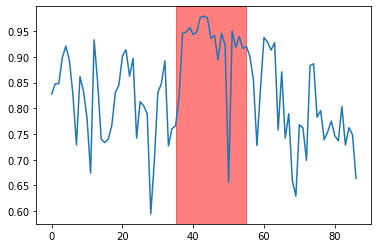

In [78]:
plt.plot(s["5th"])
plt.axvspan(35,55, color='red', alpha=0.5)
plt.show()